In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [37]:
df=pd.read_csv(r"D:\DBDA\Adavance Stats\Day 8\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [38]:
X = df.drop("Outcome",axis=1)
y=df['Outcome']

print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [40]:


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train=sc.fit_transform(X_train)

X_test =sc.transform(X_test)



In [41]:
from sklearn.linear_model import LogisticRegression
# liblinear : This so;lver is suitable for small to medium size datasets.

classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [42]:
y_test_pred=classifier.predict(X_test)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [43]:
comparison = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})

print(comparison[0:10])

     Actual  Predicted
285       0          0
101       0          0
581       0          0
352       0          0
726       0          0
472       0          0
233       0          0
385       0          0
556       0          0
59        0          0


In [44]:
from sklearn.metrics import accuracy_score
# calculates and prints the accuracy score ,which measures the fraction of correctly predicted instances in the test set

print(accuracy_score(y_test,y_test_pred))

0.7835497835497836


In [45]:
from sklearn.metrics import confusion_matrix

# calculates and prints the confusion matrix for the test set showinhg the True Positives(TP) , True Negative(TN),False Positive(FP) and False Negative(FN)

conf_mat =confusion_matrix(y_test,y_test_pred)
print(conf_mat)

[[132  14]
 [ 36  49]]


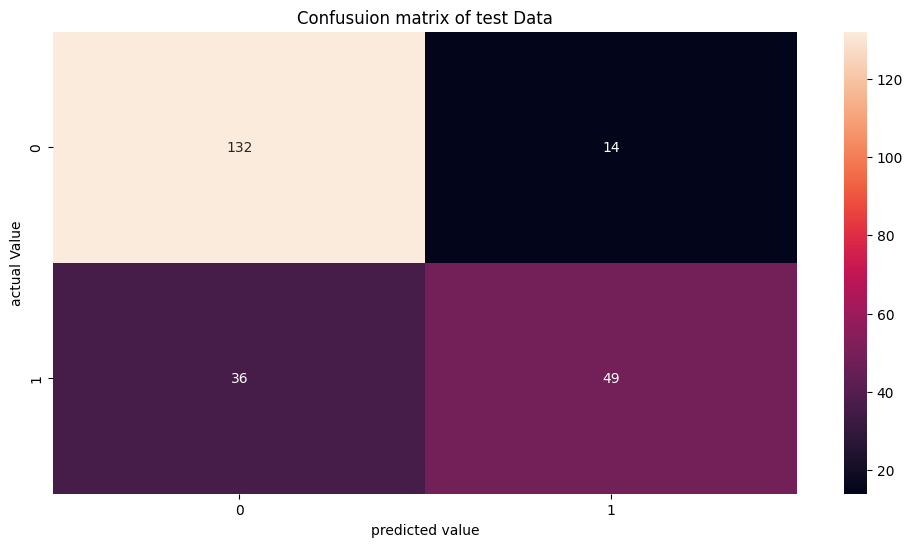

In [46]:
#creates a heatmap using seaborn to visualize the confusion matrix .This provides the graphical representation of the models performance

import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,6))
sns.heatmap(conf_mat,annot=True,fmt='d')
plt.title("Confusuion matrix of test Data")
plt.xlabel("predicted value")
plt.ylabel("actual Value")
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [48]:
TN =conf_mat[0][0]
FP =conf_mat[0][1]
FN =conf_mat[1][0]
TP=conf_mat[1][1]

recall=TP/(TP+FN)
print("Recall",recall)

precision =TP/(TP+FP)
print("Precision",precision)

specificity =TN/(TN+FP)
print("Specificity",specificity)

accuracy =(TP+TN)/(TP+TN+FP+FN)
print("Accuracy",accuracy)

Recall 0.5764705882352941
Precision 0.7777777777777778
Specificity 0.9041095890410958
Accuracy 0.7835497835497836
